Restarted Python 3.11.3

In [1]:
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
from imblearn.combine import SMOTETomek
from imblearn.over_sampling import SMOTE
from sklearn import datasets
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Lasso, LinearRegression, LogisticRegression, Ridge
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    f1_score,
    mean_squared_error,
    r2_score,
)

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler, minmax_scale
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

In [2]:
df = pd.read_csv("C:\\diabetes_012_health_indicators_BRFSS2015.csv")
df
df.shape
df.isnull().sum()
df.Diabetes_012.value_counts()
df.columns
df.Diabetes_012.value_counts(normalize=1)
df.Diabetes_012.replace(2.0,1.0,inplace=True)

In [3]:
df.drop(["Fruits", "Veggies", "NoDocbcCost"], axis=1,inplace=True)

In [4]:
df.shape
X = df.iloc[:, 1:]
y = df.iloc[:, 0]
df.columns = df.columns.str.replace(" ", "")
print(y.value_counts())
y.value_counts()

Diabetes_012
0.0    213703
1.0     39977
Name: count, dtype: int64


Diabetes_012
0.0    213703
1.0     39977
Name: count, dtype: int64

<ipython-input-5-b7f0108754da>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.loc[:, cols_to_scale] = bmi_scaler.transform(X[cols_to_scale])


array([[<Axes: title={'center': 'Income'}>]], dtype=object)

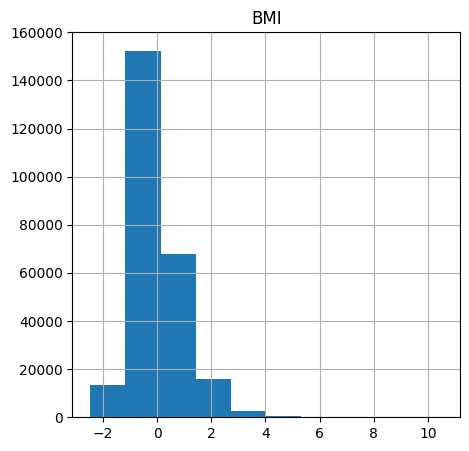

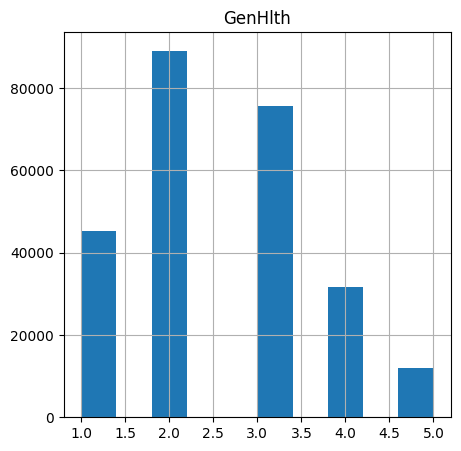

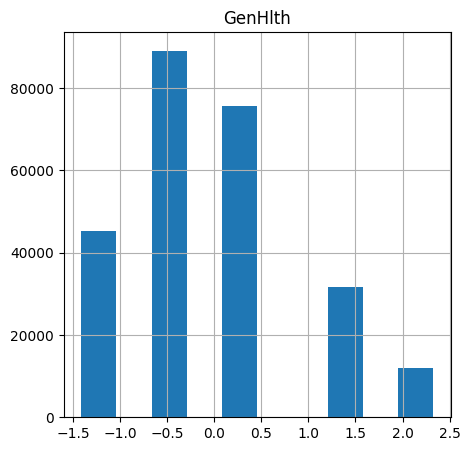

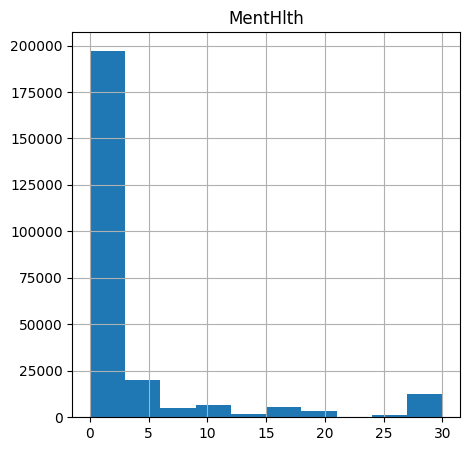

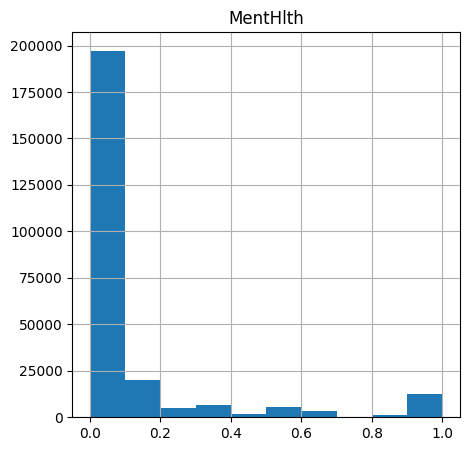

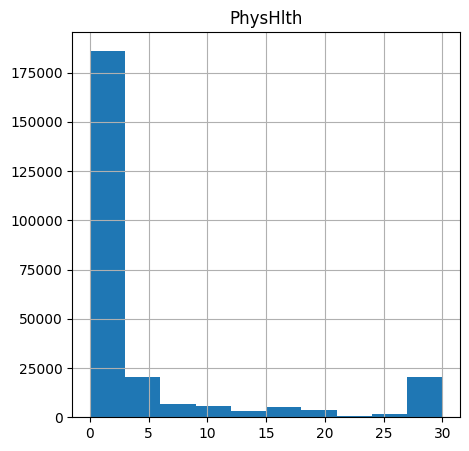

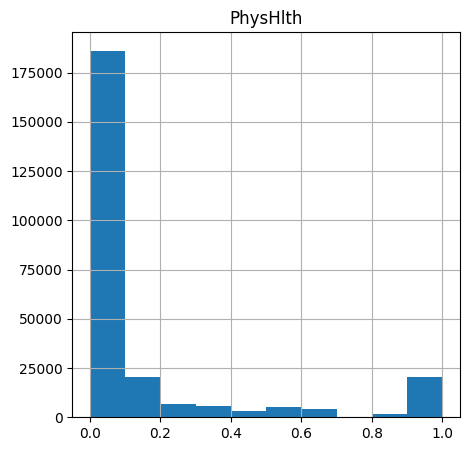

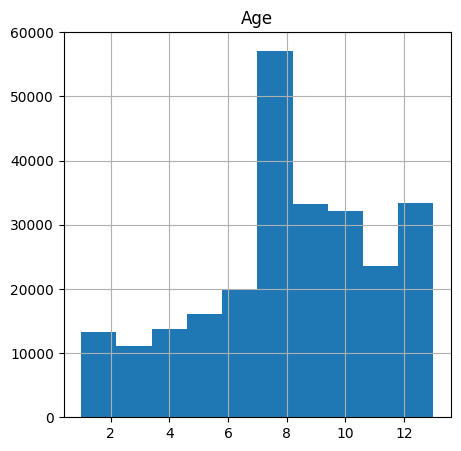

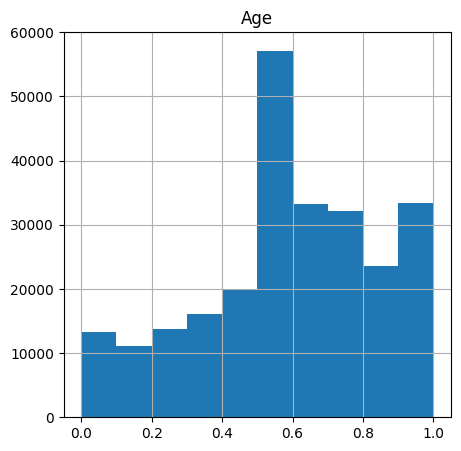

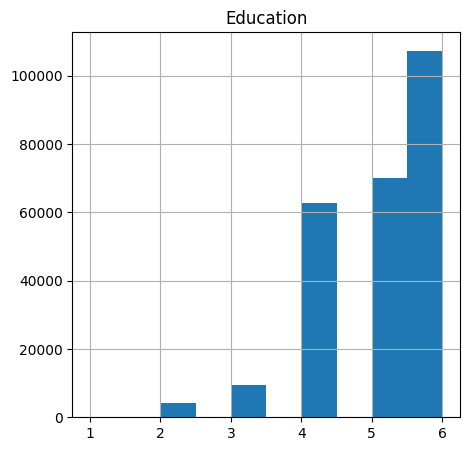

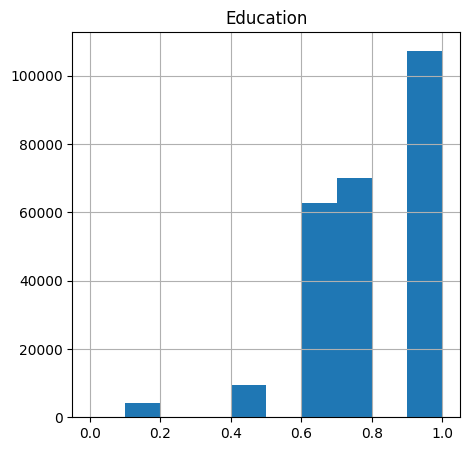

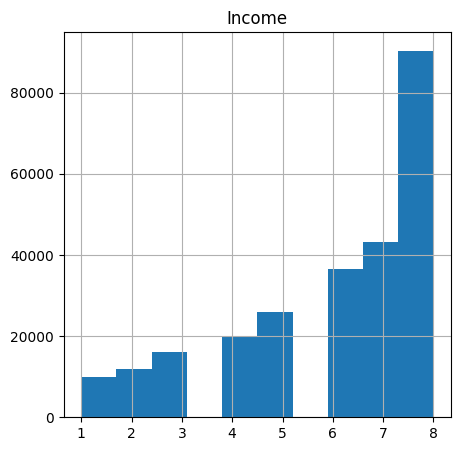

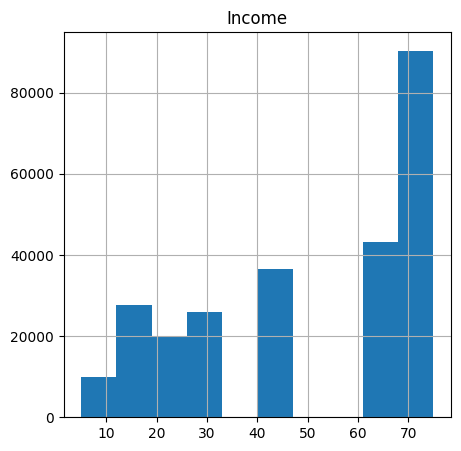

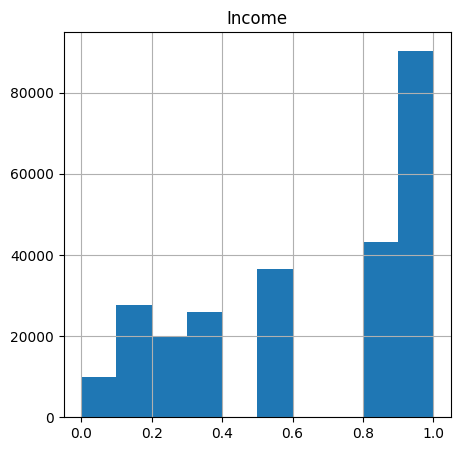

In [5]:
bmi_scaler = StandardScaler()
cols_to_scale = ["BMI"]
bmi_scaler.fit(X[cols_to_scale])
X.loc[:, cols_to_scale] = bmi_scaler.transform(X[cols_to_scale])
fig = X.hist(column="BMI", figsize=(5, 5))
import warnings
warnings.filterwarnings("ignore")
X.hist(column="GenHlth", figsize=(5, 5))
gh_scaler = StandardScaler()
cols_to_scale = ["GenHlth"]
gh_scaler.fit(X[cols_to_scale])
X[cols_to_scale] = gh_scaler.transform(X[cols_to_scale])
X.hist(column="GenHlth", figsize=(5, 5))
from sklearn.preprocessing import MinMaxScaler
X.hist(column="MentHlth", figsize=(5, 5))
ment_scaler = MinMaxScaler()
cols_to_scale = ["MentHlth"]
ment_scaler.fit(X[cols_to_scale])
X[cols_to_scale] = ment_scaler.transform(X[cols_to_scale])
X.hist(column="MentHlth", figsize=(5, 5))
X.hist(column="PhysHlth", figsize=(5, 5))
phys_scaler = MinMaxScaler()
cols_to_scale = ["PhysHlth"]
phys_scaler.fit(X[cols_to_scale])
X[cols_to_scale] = phys_scaler.transform(X[cols_to_scale])
X.hist(column="PhysHlth", figsize=(5, 5))
X.hist(column="Age", figsize=(5, 5))
age_scaler = MinMaxScaler()
cols_to_scale = ["Age"]
age_scaler.fit(X[cols_to_scale])
X[cols_to_scale] = age_scaler.transform(X[cols_to_scale])
X.hist(column="Age", figsize=(5, 5))
X.hist(column="Education", figsize=(5, 5))
edu_scaler = MinMaxScaler()
cols_to_scale = ["Education"]
edu_scaler.fit(X[cols_to_scale])
X[cols_to_scale] = edu_scaler.transform(X[cols_to_scale])
X.hist(column="Education", figsize=(5, 5))
X.hist(column="Income", figsize=(5, 5))
income_cat_to_avg_map = {
    1: 5,
    2: 12.5,
    3: 17.5,
    4: 22.5,
    5: 30.0,
    6: 42.5,
    7: 62.5,
    8: 75,
}

X = X.assign(Income=X.Income.map(income_cat_to_avg_map))
X.hist(column="Income", figsize=(5, 5))
inc_scaler = MinMaxScaler()
cols_to_scale = ["Income"]
inc_scaler.fit(X[cols_to_scale])
X[cols_to_scale] = inc_scaler.transform(X[cols_to_scale])
X.hist(column="Income", figsize=(5, 5))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=1
)
# pd.Series(y_test).value_counts().plot(kind="bar")

smt = SMOTETomek(random_state=1)
X_train, y_train = smt.fit_resample(X_train, y_train)

In [7]:
ne = [100]
mf = range(2,15)
md = range(6,15)
best = (0,None,(0,0,0))
for a in ne:
    for b in mf:
        for c in md:
            print("a={},b={},c={}".format(a,b,c))
            rf_orig= RandomForestClassifier(n_estimators=a, max_features=b, max_depth=c)
            rf_orig.fit(X_train , y_train)
            train_score = rf_orig.score(X_train , y_train)
            val_score = rf_orig.score(X_val, y_val)
            if best[0] < val_score:
                best = (val_score, rf_orig,(a,b,c))
            print(train_score)
            print(val_score)

print(best)

a=100,b=2,c=6
0.786283980294397
0.7466554977949691
a=100,b=2,c=7
0.7913773148148148
0.7465569489270492
a=100,b=2,c=8
0.8000022257834758
0.7545394072285595
a=100,b=2,c=9
0.8087124584520418
0.7591712040207939
a=100,b=2,c=10
0.8181460707502374
0.7652812338318263
a=100,b=2,c=11
0.8280025819088319
0.7697898445391609
a=100,b=2,c=12
0.8358373397435898
0.7726970361427973
a=100,b=2,c=13
0.8477638295346629
0.7812954248688068
a=100,b=2,c=14
0.8591116156220323
0.784498263076203
a=100,b=3,c=6
0.7883391203703703
0.7461873906723496
a=100,b=3,c=7
0.8001283535137702
0.75407130010594
a=100,b=3,c=8
0.808374881291548
0.7577176082189756
a=100,b=3,c=9
0.8209245904558404
0.765601517652566
a=100,b=3,c=10
0.8307885208926875
0.7734115154352165
a=100,b=3,c=11
0.8391797245963912
0.776220158170933
a=100,b=3,c=12
0.8512063746438746
0.7828968439725049
a=100,b=3,c=13
0.861341108736942
0.7876025524156791
a=100,b=3,c=14
0.8723142212725546
0.7918647909532139
a=100,b=4,c=6
0.790735547245964
0.7453989997289906
a=100,b=4,c

In [9]:
rf= RandomForestClassifier(
                n_estimators=100, max_features=14, max_depth=14
            )

rf.fit(X_train, y_train)
train_score = rf.score(X_train, y_train)
test_score = rf.score(X_test, y_test)
print(train_score)
print(test_score)

0.8985895952041786
0.8193196152633239


In [10]:
rf= RandomForestClassifier(
                n_estimators=100, max_features=15, max_depth=15
            )

rf.fit(X_train, y_train)
train_score = rf.score(X_train, y_train)
test_score = rf.score(X_test, y_test)
print(train_score)
print(test_score)

0.9078674026590693
0.8247595395774203


In [11]:
rf= RandomForestClassifier(
                n_estimators=120, max_features=15, max_depth=15
            )

rf.fit(X_train, y_train)
train_score = rf.score(X_train, y_train)
test_score = rf.score(X_test, y_test)
print(train_score)
print(test_score)

0.9080936906457739
0.8250551876379691
